In [76]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import dlc_practical_prologue as prologue
%matplotlib inline
N=1000
from torch.utils.data import DataLoader, Dataset
import tqdm
from torch.autograd import Variable

In [77]:
train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(N)

In [104]:
class CompareNet(nn.Module):
    def __init__(self):
        super(CompareNet, self).__init__()
        self.base = nn.Sequential(nn.Linear(196,64),nn.ReLU(),nn.Linear(64,32))
        self.comparator = nn.Linear(64,2)
        self.classifier = nn.Linear(32,10)
    
    def forward(self, x):
        x_0 = x[:,0,:,:].flatten(1)
        x_1 = x[:,1,:,:].flatten(1)
        x_0 = F.relu(self.base(x_0))
        x_1 = F.relu(self.base(x_1))
        sign = F.relu(self.comparator(torch.cat([x_0,x_1],dim = 1)))
        digit_0 = F.relu(self.classifier(x_0))
        digit_1 = F.relu(self.classifier(x_1))
        return sign, digit_0, digit_1
    

In [105]:
class DigitPairsDataset(Dataset):
    def __init__(self,img_pair,targets, classes):
        super(DigitPairsDataset, self).__init__()
        self.img_pair = img_pair
        self.targets = targets
        self.classes = classes
    
    def __len__(self):
        return self.targets.size()[0]
    
    def __getitem__(self, idx):
        return self.img_pair[idx], self.targets[idx], self.classes[idx]

In [108]:
net = CompareNet()
criterion = nn.CrossEntropyLoss()
mu = 1.0
optimizer = optim.Adam(net.parameters(),lr = 0.001)
train_dataset = DigitPairsDataset(train_input,train_target,train_classes)
test_dataset = DigitPairsDataset(test_input,test_target,test_classes)
train_loader = DataLoader(train_dataset,batch_size=32, shuffle = True, num_workers = 4)
test_loader = DataLoader(test_dataset,batch_size=32, shuffle = True, num_workers = 4)

def calc_accuracy(data_loader,model):
    correct_count = 0.0
    for i, data in enumerate(data_loader,0):
        img_pair, target, classes = data
        pred_sign, pred_class0, pred_class1 = model(img_pair)
        pred = torch.argmax(pred_sign,-1)
        correct_count += int((target.eq(pred)).sum())
    return correct_count*100.0/N

epochs = 200
loss_arr = []
train_acc_arr = []
val_acc_arr = []

for epoch in tqdm.tqdm(range(epochs)):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
        img_pair, target, classes = data
        optimizer.zero_grad()

        pred_sign, pred_class0, pred_class1 = net(img_pair)
        loss = criterion(pred_sign,target)+ mu*(criterion(pred_class0, classes[:,0])+ criterion(pred_class1, classes[:,1]))
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    net.eval()
    running_loss /= N
    loss_arr.append(running_loss)
    train_acc = calc_accuracy(train_loader,net)
    val_acc = calc_accuracy(test_loader,net)
    train_acc_arr.append(train_acc)
    val_acc_arr.append(val_acc)
    if epoch % 10 == 9:
        print("Epoch : %d  ,   Train Accuracy : %.2f  , Validation Accuracy : %.2f , Training Loss : %.6f" %(epoch, train_acc, val_acc, running_loss))

















  0%|          | 0/200 [00:00<?, ?it/s]















  0%|          | 1/200 [00:00<02:01,  1.64it/s]















  1%|          | 2/200 [00:01<01:57,  1.68it/s]















  2%|▏         | 3/200 [00:01<02:08,  1.53it/s]















  2%|▏         | 4/200 [00:02<02:01,  1.61it/s]















  2%|▎         | 5/200 [00:03<02:03,  1.57it/s]















  3%|▎         | 6/200 [00:03<01:57,  1.64it/s]















  4%|▎         | 7/200 [00:04<01:54,  1.69it/s]















  4%|▍         | 8/200 [00:04<01:50,  1.73it/s]















  4%|▍         | 9/200 [00:05<01:57,  1.63it/s]















  5%|▌         | 10/200 [00:06<02:01,  1.56it/s]

Epoch : 9  ,   Train Accuracy : 53.50  , Validation Accuracy : 53.30 , Training Loss : 0.080812


















  6%|▌         | 11/200 [00:06<02:06,  1.49it/s]















  6%|▌         | 12/200 [00:07<02:00,  1.56it/s]















  6%|▋         | 13/200 [00:08<01:55,  1.62it/s]















  7%|▋         | 14/200 [00:08<02:00,  1.54it/s]















  8%|▊         | 15/200 [00:09<01:54,  1.62it/s]















  8%|▊         | 16/200 [00:09<01:54,  1.61it/s]















  8%|▊         | 17/200 [00:10<01:53,  1.61it/s]















  9%|▉         | 18/200 [00:11<01:49,  1.65it/s]















 10%|▉         | 19/200 [00:11<01:55,  1.57it/s]















 10%|█         | 20/200 [00:12<01:58,  1.52it/s]

Epoch : 19  ,   Train Accuracy : 53.50  , Validation Accuracy : 53.40 , Training Loss : 0.037813


















 10%|█         | 21/200 [00:13<01:52,  1.60it/s]















 11%|█         | 22/200 [00:13<01:47,  1.65it/s]















 12%|█▏        | 23/200 [00:14<01:43,  1.70it/s]















 12%|█▏        | 24/200 [00:14<01:40,  1.74it/s]















 12%|█▎        | 25/200 [00:15<01:38,  1.77it/s]















 13%|█▎        | 26/200 [00:16<01:45,  1.65it/s]















 14%|█▎        | 27/200 [00:16<01:45,  1.64it/s]















 14%|█▍        | 28/200 [00:17<01:48,  1.59it/s]















 14%|█▍        | 29/200 [00:18<01:51,  1.53it/s]















 15%|█▌        | 30/200 [00:18<01:55,  1.47it/s]

Epoch : 29  ,   Train Accuracy : 53.80  , Validation Accuracy : 53.40 , Training Loss : 0.032429


















 16%|█▌        | 31/200 [00:19<01:48,  1.56it/s]















 16%|█▌        | 32/200 [00:19<01:44,  1.61it/s]















 16%|█▋        | 33/200 [00:20<01:40,  1.66it/s]















 17%|█▋        | 34/200 [00:21<01:37,  1.71it/s]















 18%|█▊        | 35/200 [00:21<01:43,  1.59it/s]















 18%|█▊        | 36/200 [00:22<01:43,  1.58it/s]















 18%|█▊        | 37/200 [00:22<01:41,  1.61it/s]















 19%|█▉        | 38/200 [00:23<01:45,  1.54it/s]















 20%|█▉        | 39/200 [00:24<01:51,  1.44it/s]















 20%|██        | 40/200 [00:25<01:46,  1.50it/s]

Epoch : 39  ,   Train Accuracy : 53.50  , Validation Accuracy : 53.40 , Training Loss : 0.029791


















 20%|██        | 41/200 [00:25<01:41,  1.57it/s]















 21%|██        | 42/200 [00:26<01:35,  1.65it/s]















 22%|██▏       | 43/200 [00:26<01:41,  1.54it/s]















 22%|██▏       | 44/200 [00:27<01:41,  1.53it/s]















 22%|██▎       | 45/200 [00:28<01:37,  1.59it/s]















 23%|██▎       | 46/200 [00:28<01:32,  1.66it/s]















 24%|██▎       | 47/200 [00:29<01:30,  1.69it/s]















 24%|██▍       | 48/200 [00:30<01:42,  1.48it/s]















 24%|██▍       | 49/200 [00:30<01:44,  1.45it/s]















 25%|██▌       | 50/200 [00:31<01:45,  1.43it/s]

Epoch : 49  ,   Train Accuracy : 78.60  , Validation Accuracy : 71.30 , Training Loss : 0.011400


















 26%|██▌       | 51/200 [00:32<01:51,  1.34it/s]















 26%|██▌       | 52/200 [00:33<01:41,  1.46it/s]















 26%|██▋       | 53/200 [00:33<01:34,  1.56it/s]















 27%|██▋       | 54/200 [00:34<01:29,  1.63it/s]















 28%|██▊       | 55/200 [00:34<01:35,  1.52it/s]















 28%|██▊       | 56/200 [00:35<01:41,  1.42it/s]















 28%|██▊       | 57/200 [00:36<01:43,  1.39it/s]















 29%|██▉       | 58/200 [00:37<01:36,  1.48it/s]















 30%|██▉       | 59/200 [00:37<01:31,  1.54it/s]















 30%|███       | 60/200 [00:38<01:27,  1.60it/s]

Epoch : 59  ,   Train Accuracy : 94.60  , Validation Accuracy : 81.90 , Training Loss : 0.003282


















 30%|███       | 61/200 [00:38<01:23,  1.66it/s]















 31%|███       | 62/200 [00:39<01:20,  1.71it/s]















 32%|███▏      | 63/200 [00:39<01:18,  1.75it/s]















 32%|███▏      | 64/200 [00:40<01:16,  1.79it/s]















 32%|███▎      | 65/200 [00:40<01:14,  1.81it/s]















 33%|███▎      | 66/200 [00:41<01:13,  1.82it/s]















 34%|███▎      | 67/200 [00:41<01:13,  1.82it/s]















 34%|███▍      | 68/200 [00:42<01:13,  1.81it/s]















 34%|███▍      | 69/200 [00:43<01:11,  1.83it/s]















 35%|███▌      | 70/200 [00:43<01:10,  1.84it/s]

Epoch : 69  ,   Train Accuracy : 99.10  , Validation Accuracy : 83.80 , Training Loss : 0.001675


















 36%|███▌      | 71/200 [00:44<01:10,  1.83it/s]















 36%|███▌      | 72/200 [00:44<01:09,  1.85it/s]















 36%|███▋      | 73/200 [00:45<01:09,  1.84it/s]















 37%|███▋      | 74/200 [00:45<01:08,  1.85it/s]















 38%|███▊      | 75/200 [00:46<01:07,  1.86it/s]















 38%|███▊      | 76/200 [00:46<01:07,  1.84it/s]















 38%|███▊      | 77/200 [00:47<01:07,  1.84it/s]















 39%|███▉      | 78/200 [00:47<01:06,  1.84it/s]















 40%|███▉      | 79/200 [00:48<01:05,  1.85it/s]















 40%|████      | 80/200 [00:49<01:05,  1.84it/s]

Epoch : 79  ,   Train Accuracy : 99.20  , Validation Accuracy : 84.50 , Training Loss : 0.001323


















 40%|████      | 81/200 [00:49<01:04,  1.86it/s]















 41%|████      | 82/200 [00:50<01:03,  1.86it/s]















 42%|████▏     | 83/200 [00:50<01:07,  1.72it/s]















 42%|████▏     | 84/200 [00:51<01:06,  1.76it/s]















 42%|████▎     | 85/200 [00:51<01:04,  1.80it/s]















 43%|████▎     | 86/200 [00:52<01:02,  1.81it/s]















 44%|████▎     | 87/200 [00:52<01:01,  1.83it/s]















 44%|████▍     | 88/200 [00:53<01:00,  1.85it/s]















 44%|████▍     | 89/200 [00:53<00:59,  1.86it/s]















 45%|████▌     | 90/200 [00:54<00:58,  1.87it/s]

Epoch : 89  ,   Train Accuracy : 99.30  , Validation Accuracy : 84.20 , Training Loss : 0.001317


















 46%|████▌     | 91/200 [00:55<00:59,  1.83it/s]















 46%|████▌     | 92/200 [00:55<00:58,  1.84it/s]















 46%|████▋     | 93/200 [00:56<00:57,  1.85it/s]















 47%|████▋     | 94/200 [00:56<00:57,  1.85it/s]















 48%|████▊     | 95/200 [00:57<00:57,  1.81it/s]















 48%|████▊     | 96/200 [00:57<00:56,  1.83it/s]















 48%|████▊     | 97/200 [00:58<00:56,  1.84it/s]















 49%|████▉     | 98/200 [00:58<00:55,  1.84it/s]















 50%|████▉     | 99/200 [00:59<00:55,  1.83it/s]















 50%|█████     | 100/200 [00:59<00:54,  1.84it/s]

Epoch : 99  ,   Train Accuracy : 99.50  , Validation Accuracy : 84.30 , Training Loss : 0.001230


















 50%|█████     | 101/200 [01:00<00:53,  1.84it/s]















 51%|█████     | 102/200 [01:01<00:52,  1.86it/s]















 52%|█████▏    | 103/200 [01:01<00:52,  1.86it/s]















 52%|█████▏    | 104/200 [01:02<00:51,  1.87it/s]















 52%|█████▎    | 105/200 [01:02<00:51,  1.84it/s]















 53%|█████▎    | 106/200 [01:03<00:50,  1.85it/s]















 54%|█████▎    | 107/200 [01:03<00:49,  1.86it/s]















 54%|█████▍    | 108/200 [01:04<00:49,  1.88it/s]















 55%|█████▍    | 109/200 [01:04<00:48,  1.87it/s]















 55%|█████▌    | 110/200 [01:05<00:48,  1.87it/s]

Epoch : 109  ,   Train Accuracy : 99.50  , Validation Accuracy : 84.70 , Training Loss : 0.001290


















 56%|█████▌    | 111/200 [01:05<00:47,  1.86it/s]















 56%|█████▌    | 112/200 [01:06<00:47,  1.86it/s]















 56%|█████▋    | 113/200 [01:06<00:46,  1.86it/s]















 57%|█████▋    | 114/200 [01:07<00:46,  1.85it/s]















 57%|█████▊    | 115/200 [01:08<00:45,  1.85it/s]















 58%|█████▊    | 116/200 [01:08<00:45,  1.86it/s]















 58%|█████▊    | 117/200 [01:09<00:44,  1.87it/s]















 59%|█████▉    | 118/200 [01:09<00:43,  1.87it/s]















 60%|█████▉    | 119/200 [01:10<00:46,  1.74it/s]















 60%|██████    | 120/200 [01:10<00:46,  1.73it/s]

Epoch : 119  ,   Train Accuracy : 99.50  , Validation Accuracy : 84.50 , Training Loss : 0.001516


















 60%|██████    | 121/200 [01:11<00:44,  1.76it/s]















 61%|██████    | 122/200 [01:11<00:43,  1.78it/s]















 62%|██████▏   | 123/200 [01:12<00:42,  1.80it/s]















 62%|██████▏   | 124/200 [01:13<00:41,  1.81it/s]















 62%|██████▎   | 125/200 [01:13<00:40,  1.83it/s]















 63%|██████▎   | 126/200 [01:14<00:40,  1.84it/s]















 64%|██████▎   | 127/200 [01:14<00:40,  1.79it/s]















 64%|██████▍   | 128/200 [01:15<00:40,  1.80it/s]















 64%|██████▍   | 129/200 [01:15<00:39,  1.82it/s]















 65%|██████▌   | 130/200 [01:16<00:38,  1.84it/s]

Epoch : 129  ,   Train Accuracy : 91.60  , Validation Accuracy : 79.30 , Training Loss : 0.015957


















 66%|██████▌   | 131/200 [01:16<00:37,  1.83it/s]















 66%|██████▌   | 132/200 [01:17<00:37,  1.82it/s]















 66%|██████▋   | 133/200 [01:17<00:36,  1.84it/s]















 67%|██████▋   | 134/200 [01:18<00:35,  1.85it/s]















 68%|██████▊   | 135/200 [01:19<00:34,  1.86it/s]















 68%|██████▊   | 136/200 [01:19<00:34,  1.87it/s]















 68%|██████▊   | 137/200 [01:20<00:33,  1.89it/s]















 69%|██████▉   | 138/200 [01:20<00:32,  1.89it/s]















 70%|██████▉   | 139/200 [01:21<00:32,  1.90it/s]















 70%|███████   | 140/200 [01:21<00:31,  1.90it/s]

Epoch : 139  ,   Train Accuracy : 99.90  , Validation Accuracy : 85.10 , Training Loss : 0.001281


















 70%|███████   | 141/200 [01:22<00:31,  1.90it/s]















 71%|███████   | 142/200 [01:22<00:30,  1.88it/s]















 72%|███████▏  | 143/200 [01:23<00:30,  1.87it/s]















 72%|███████▏  | 144/200 [01:23<00:29,  1.88it/s]















 72%|███████▎  | 145/200 [01:24<00:29,  1.89it/s]















 73%|███████▎  | 146/200 [01:24<00:28,  1.88it/s]















 74%|███████▎  | 147/200 [01:25<00:28,  1.89it/s]















 74%|███████▍  | 148/200 [01:25<00:27,  1.89it/s]















 74%|███████▍  | 149/200 [01:26<00:26,  1.89it/s]















 75%|███████▌  | 150/200 [01:26<00:26,  1.88it/s]

Epoch : 149  ,   Train Accuracy : 99.90  , Validation Accuracy : 84.80 , Training Loss : 0.000945


















 76%|███████▌  | 151/200 [01:27<00:26,  1.87it/s]















 76%|███████▌  | 152/200 [01:28<00:25,  1.87it/s]















 76%|███████▋  | 153/200 [01:28<00:24,  1.89it/s]















 77%|███████▋  | 154/200 [01:29<00:24,  1.89it/s]















 78%|███████▊  | 155/200 [01:29<00:24,  1.87it/s]















 78%|███████▊  | 156/200 [01:30<00:23,  1.87it/s]















 78%|███████▊  | 157/200 [01:30<00:23,  1.87it/s]















 79%|███████▉  | 158/200 [01:31<00:22,  1.86it/s]















 80%|███████▉  | 159/200 [01:31<00:21,  1.88it/s]















 80%|████████  | 160/200 [01:32<00:22,  1.78it/s]

Epoch : 159  ,   Train Accuracy : 99.90  , Validation Accuracy : 84.80 , Training Loss : 0.000937


















 80%|████████  | 161/200 [01:32<00:21,  1.78it/s]















 81%|████████  | 162/200 [01:33<00:21,  1.81it/s]















 82%|████████▏ | 163/200 [01:34<00:20,  1.81it/s]















 82%|████████▏ | 164/200 [01:34<00:19,  1.83it/s]















 82%|████████▎ | 165/200 [01:35<00:18,  1.85it/s]















 83%|████████▎ | 166/200 [01:35<00:18,  1.85it/s]















 84%|████████▎ | 167/200 [01:36<00:17,  1.87it/s]















 84%|████████▍ | 168/200 [01:36<00:17,  1.81it/s]















 84%|████████▍ | 169/200 [01:37<00:17,  1.79it/s]















 85%|████████▌ | 170/200 [01:37<00:16,  1.81it/s]

Epoch : 169  ,   Train Accuracy : 99.90  , Validation Accuracy : 84.60 , Training Loss : 0.000836


















 86%|████████▌ | 171/200 [01:38<00:15,  1.82it/s]















 86%|████████▌ | 172/200 [01:38<00:15,  1.85it/s]















 86%|████████▋ | 173/200 [01:39<00:14,  1.86it/s]















 87%|████████▋ | 174/200 [01:39<00:13,  1.87it/s]















 88%|████████▊ | 175/200 [01:40<00:13,  1.87it/s]















 88%|████████▊ | 176/200 [01:41<00:12,  1.88it/s]















 88%|████████▊ | 177/200 [01:41<00:12,  1.88it/s]















 89%|████████▉ | 178/200 [01:42<00:11,  1.88it/s]















 90%|████████▉ | 179/200 [01:42<00:11,  1.86it/s]















 90%|█████████ | 180/200 [01:43<00:10,  1.86it/s]

Epoch : 179  ,   Train Accuracy : 99.40  , Validation Accuracy : 83.60 , Training Loss : 0.001040


















 90%|█████████ | 181/200 [01:43<00:10,  1.83it/s]















 91%|█████████ | 182/200 [01:44<00:09,  1.83it/s]















 92%|█████████▏| 183/200 [01:44<00:09,  1.83it/s]















 92%|█████████▏| 184/200 [01:45<00:08,  1.83it/s]















 92%|█████████▎| 185/200 [01:45<00:08,  1.85it/s]















 93%|█████████▎| 186/200 [01:46<00:07,  1.86it/s]















 94%|█████████▎| 187/200 [01:47<00:07,  1.82it/s]















 94%|█████████▍| 188/200 [01:47<00:06,  1.81it/s]















 94%|█████████▍| 189/200 [01:48<00:06,  1.71it/s]















 95%|█████████▌| 190/200 [01:48<00:06,  1.65it/s]

Epoch : 189  ,   Train Accuracy : 99.90  , Validation Accuracy : 84.00 , Training Loss : 0.000724


















 96%|█████████▌| 191/200 [01:49<00:05,  1.64it/s]















 96%|█████████▌| 192/200 [01:50<00:04,  1.68it/s]















 96%|█████████▋| 193/200 [01:50<00:04,  1.68it/s]















 97%|█████████▋| 194/200 [01:51<00:04,  1.46it/s]















 98%|█████████▊| 195/200 [01:52<00:03,  1.43it/s]















 98%|█████████▊| 196/200 [01:53<00:02,  1.40it/s]















 98%|█████████▊| 197/200 [01:53<00:02,  1.39it/s]















 99%|█████████▉| 198/200 [01:54<00:01,  1.37it/s]















100%|█████████▉| 199/200 [01:55<00:00,  1.38it/s]















100%|██████████| 200/200 [01:56<00:00,  1.72it/s]

Epoch : 199  ,   Train Accuracy : 99.90  , Validation Accuracy : 84.40 , Training Loss : 0.000720


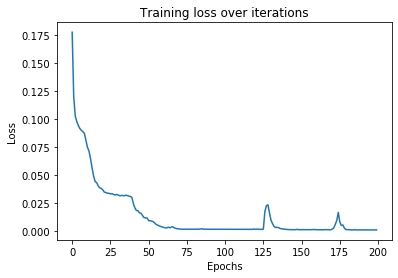

In [109]:
plt.plot(range(epochs),loss_arr)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss over iterations")
plt.show()

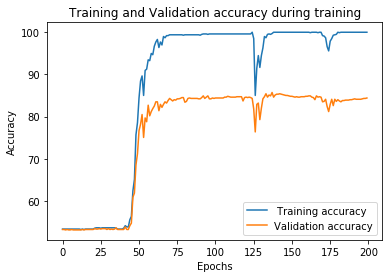

In [110]:
plt.plot(range(epochs),train_acc_arr, label  =" Training accuracy")
plt.plot(range(epochs), val_acc_arr, label ="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.title("Training and Validation accuracy during training")
plt.legend()
plt.show()